In [9]:
import pandas as pd

data = pd.read_excel("AssignmentData.xlsx")

To analyze and compare the value brought in by each department in various quarters, we will follow these steps:

Calculate the value brought in by each department in each quarter using the formula provided.
Normalize the computed values to lie in the range of 0-1 for easier interpretation.
Visualize the results to compare the performance of each department across quarters.
Let's start with step 1: calculating the value brought in by each department in each quarter.

In [10]:
data['Department Value'] = data['Actual Productivity'] / (8.4 * 10**5 / 2)  # Divide by half of the quarterly spend

print(data[['Quarter', 'Department', 'Department Value']])


     Quarter Department  Department Value
0         Q1     Sewing      2.239822e-06
1         Q1  Finishing      2.110714e-06
2         Q1     Sewing      1.906120e-06
3         Q1     Sewing      1.906120e-06
4         Q1     Sewing               NaN
...      ...        ...               ...
1192      Q2  Finishing      1.496032e-06
1193      Q2  Finishing               NaN
1194      Q2  Finishing      1.489583e-06
1195      Q2  Finishing      1.204497e-06
1196      Q2  Finishing      9.398148e-07

[1197 rows x 3 columns]


Now, let's proceed to step 2: normalizing the computed values.

In [11]:
data['Normalized Department Value'] = (data['Department Value'] - data['Department Value'].min()) / (data['Department Value'].max() - data['Department Value'].min())

print(data[['Quarter', 'Department', 'Normalized Department Value']])


     Quarter Department  Normalized Department Value
0         Q1     Sewing                     0.797332
1         Q1  Finishing                     0.736180
2         Q1     Sewing                     0.639274
3         Q1     Sewing                     0.639274
4         Q1     Sewing                          NaN
...      ...        ...                          ...
1192      Q2  Finishing                     0.445036
1193      Q2  Finishing                          NaN
1194      Q2  Finishing                     0.441982
1195      Q2  Finishing                     0.306951
1196      Q2  Finishing                     0.181584

[1197 rows x 3 columns]


Finally, for step 3: visualizing the results, we can use bar plots to compare the performance of each department across quarters.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

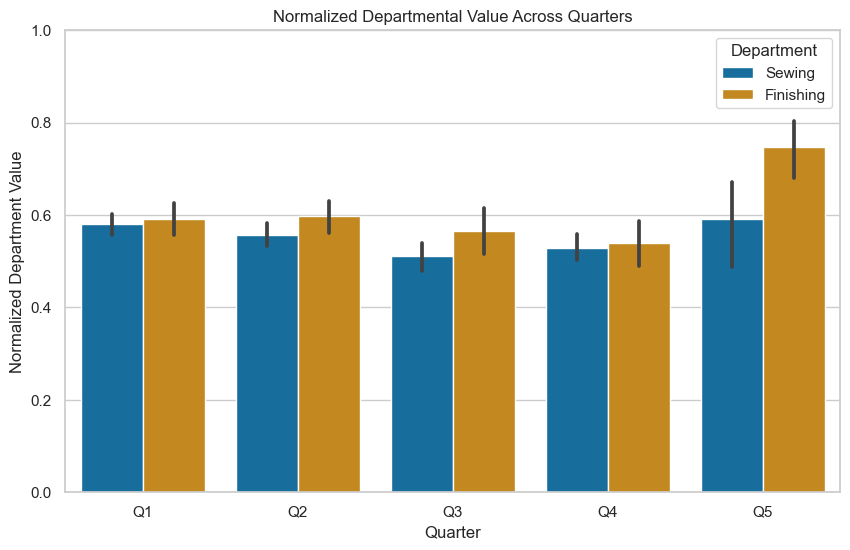

In [13]:
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Quarter', y='Normalized Department Value', hue='Department', palette='colorblind')
plt.title('Normalized Departmental Value Across Quarters')
plt.xlabel('Quarter')
plt.ylabel('Normalized Department Value')
plt.legend(title='Department')
plt.ylim(0, 1)
plt.show()

This visualization will provide an easier understanding of the management to compare the performance of each department across quarters.

Now, let's move on to the second part of the question: suggesting an allocation strategy for the organizational budget.

Since the normalized departmental values provide a relative measure of performance, we can use them to inform the allocation strategy. One approach could be to allocate resources proportionally based on the performance of each department. For example, if one department consistently performs better, it could receive a larger share of the budget.

In [14]:
# Calculate the average normalized departmental value for each department
avg_normalized_value = data.groupby('Department')['Normalized Department Value'].mean()

# Proportional allocation strategy
allocation_strategy = avg_normalized_value / avg_normalized_value.sum()

# Display the allocation strategy
print("Allocation Strategy:")
print(allocation_strategy)


Allocation Strategy:
Department
Finishing    0.514377
Sewing       0.485623
Name: Normalized Department Value, dtype: float64


This allocation strategy ensures that resources are allocated in proportion to each department's contribution to the organization's value, thereby optimizing resource utilization.